## Week three - Polynomial Regression

<p>First, import necessary libraries. Then load test and train data into them.</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

### Create a dataframe representing a polynomial function given a feature and degree

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

In [5]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [6]:
poly_regression_model_one = linear_model.LinearRegression()
columns_one = ['power_1']
poly_regression_model_one.fit(poly1_data[list(columns_one)].values, poly1_data['price'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Plot  the data as well as the line of fit.

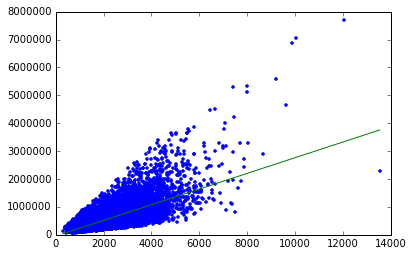

In [7]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], poly_regression_model_one.predict(poly1_data[list(columns_one)].values),'-')

### Predict and plot the data for 2, 3, and 15th power polynomials

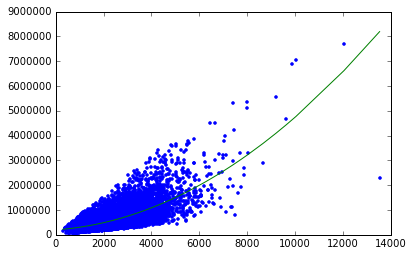

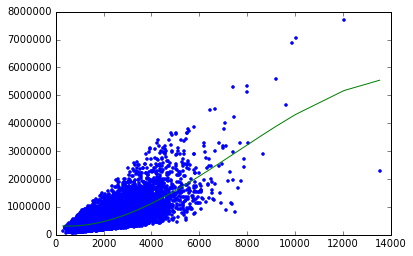

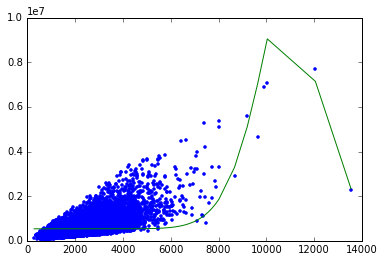

In [8]:
# 2nd order
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

poly_regression_model_two = linear_model.LinearRegression()
columns_two = poly2_data.columns.values[0:-1]
poly_regression_model_two.fit(poly2_data[list(columns_two)].values, poly2_data['price'].values)

plt.plot(poly2_data['power_1'],poly1_data['price'],'.',
poly2_data['power_1'], poly_regression_model_two.predict(poly2_data[list(columns_two)].values),'-')
plt.show()

# 3rd order
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

poly_regression_model_three = linear_model.LinearRegression()
columns_three = poly3_data.columns.values[0:-1]
poly_regression_model_three.fit(poly3_data[list(columns_three)].values, poly3_data['price'].values)

plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
poly3_data['power_1'], poly_regression_model_three.predict(poly3_data[list(columns_three)].values),'-')
plt.show()

#15th order
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

poly_regression_model_fifteen = linear_model.LinearRegression()
columns_fifteen = poly15_data.columns.values[0:-1]
poly_regression_model_fifteen.fit(poly15_data[list(columns_fifteen)].values, poly15_data['price'].values)

plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
poly15_data['power_1'], poly_regression_model_fifteen.predict(poly15_data[list(columns_fifteen)].values),'-')
plt.show()

### Load data for all subsets and fit 15th order on them

In [9]:
set_one = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_two = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_three = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_four = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

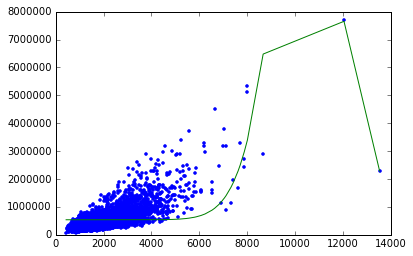

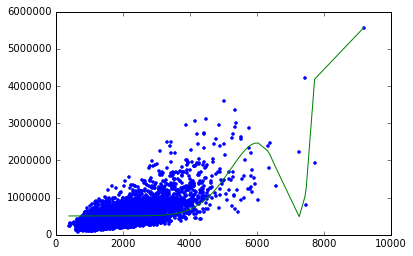

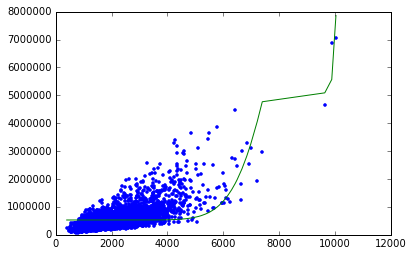

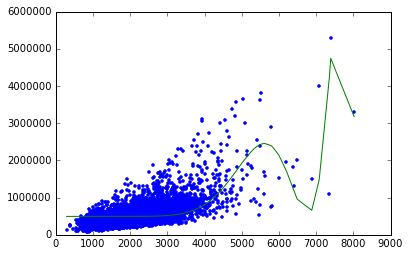

In [10]:
poly15_set_one = polynomial_dataframe(set_one['sqft_living'], 15)
poly15_set_one['price'] = set_one['price']

model_one_fifteen = linear_model.LinearRegression()
columns_fifteen = poly15_set_one.columns.values[0:-1]
model_one_fifteen.fit(poly15_set_one[list(columns_fifteen)].values, poly15_set_one['price'].values)

plt.plot(poly15_set_one['power_1'],poly15_set_one['price'],'.',
poly15_set_one['power_1'], model_one_fifteen.predict(poly15_set_one[list(columns_fifteen)].values),'-')
plt.show()

poly15_set_two = polynomial_dataframe(set_two['sqft_living'], 15)
poly15_set_two['price'] = set_two['price']

model_two_fifteen = linear_model.LinearRegression()
model_two_fifteen.fit(poly15_set_two[list(columns_fifteen)].values, poly15_set_two['price'].values)

plt.plot(poly15_set_two['power_1'],poly15_set_two['price'],'.',
poly15_set_two['power_1'], model_two_fifteen.predict(poly15_set_two[list(columns_fifteen)].values),'-')
plt.show()

poly15_set_three = polynomial_dataframe(set_three['sqft_living'], 15)
poly15_set_three['price'] = set_three['price']

model_three_fifteen = linear_model.LinearRegression()
model_three_fifteen.fit(poly15_set_three[list(columns_fifteen)].values, poly15_set_three['price'].values)

plt.plot(poly15_set_three['power_1'],poly15_set_three['price'],'.',
poly15_set_three['power_1'], model_three_fifteen.predict(poly15_set_three[list(columns_fifteen)].values),'-')
plt.show()

poly15_set_four = polynomial_dataframe(set_four['sqft_living'], 15)
poly15_set_four['price'] = set_four['price']

model_four_fifteen = linear_model.LinearRegression()
model_four_fifteen.fit(poly15_set_four[list(columns_fifteen)].values, poly15_set_four['price'].values)

plt.plot(poly15_set_four['power_1'],poly15_set_four['price'],'.',
poly15_set_four['power_1'], model_four_fifteen.predict(poly15_set_four[list(columns_fifteen)].values),'-')
plt.show()

In [11]:
print model_one_fifteen.coef_

[  3.05794168e-90   2.21229718e-49   6.14919047e-55   3.70645715e-60
  -1.76896679e-74   1.10358334e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]


In [12]:
print model_two_fifteen.coef_

[  2.68007730e-77  -1.28315451e-39   2.29856318e-45   3.90813500e-49
   2.27126043e-53  -8.03782665e-57   3.62841089e-55   1.49807480e-51
   5.73974428e-48   1.95158330e-44   5.37897035e-41   9.38035527e-38
  -3.62478309e-41   4.63968356e-45  -1.96500469e-49]


In [13]:
print model_three_fifteen.coef_

[  2.83751934e-88   1.17220384e-48   1.05176250e-55   1.55068038e-59
   1.64169385e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]


In [14]:
print model_four_fifteen.coef_

[  1.37062038e-76  -7.34880850e-40  -4.26691045e-44  -3.79757873e-49
  -1.08322540e-53   2.33358797e-57   1.27051232e-54   4.87799087e-51
   1.73524692e-47   5.46982656e-44   1.39568453e-40   2.25011157e-37
  -9.43820714e-41   1.31553951e-44  -6.09071716e-49]


In [15]:
training_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [16]:
for i in range(1,16):
    model = linear_model.LinearRegression()
    polynomial_training = polynomial_dataframe(training_data['sqft_living'], i)
    polynomial_training['price'] = training_data['price']
    columns = polynomial_training.columns.values[0:-1]
    model.fit(polynomial_training[list(columns)].values, polynomial_training['price'].values)
    validation_set = polynomial_dataframe(validation_data['sqft_living'], i)
    validation_set['price'] = validation_data['price'] 
    print 'The RSS for coefficient size of: ' + str(i)
    print sum((model.predict(validation_set[list(columns)].values) - validation_set['price'].values) ** 2)

The RSS for coefficient size of: 1
6.290978863e+14
The RSS for coefficient size of: 2
6.23955062707e+14
The RSS for coefficient size of: 3
6.25820280251e+14
The RSS for coefficient size of: 4
6.2998733966e+14
The RSS for coefficient size of: 5
6.28258901689e+14
The RSS for coefficient size of: 6
5.66268584233e+14
The RSS for coefficient size of: 7
1.07384578597e+15
The RSS for coefficient size of: 8
7.08754028166e+15
The RSS for coefficient size of: 9
4.53136707827e+16
The RSS for coefficient size of: 10
2.47212377341e+17
The RSS for coefficient size of: 11
1.19324086636e+18
The RSS for coefficient size of: 12
5.27326854025e+18
The RSS for coefficient size of: 13
7.61623002134e+17
The RSS for coefficient size of: 14
2.29756092492e+18
The RSS for coefficient size of: 15
6.95503809809e+18


In [17]:
model = linear_model.LinearRegression()
polynomial_training = polynomial_dataframe(training_data['sqft_living'], 6)
polynomial_training['price'] = training_data['price']
columns = polynomial_training.columns.values[0:-1]
model.fit(polynomial_training[list(columns)].values, polynomial_training['price'].values)
test_set = polynomial_dataframe(test_data['sqft_living'], 6)
test_set['price'] = test_data['price'] 
print 'The RSS for coefficient size of: ' + str(3)
print sum((model.predict(test_set[list(columns)].values) - test_set['price'].values) ** 2)

The RSS for coefficient size of: 3
1.35225109698e+14
